# Setup

In [1]:
!rm -rf Sliced_Normal
!git clone https://github.com/Arindam-97/Sliced_Normal.git
%cd Sliced_Normal


Cloning into 'Sliced_Normal'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 40 (delta 14), reused 24 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 27.88 KiB | 713.00 KiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/Sliced_Normal


In [2]:
import os
os.chdir('/content/Sliced_Normal') # change this to folder where package cloned

In [3]:
!pip install -r requirements.txt
!pip install -e sliced_normals

Obtaining file:///content/Sliced_Normal/sliced_normals
  Preparing metadata (setup.py) ... done
  Running setup.py develop for sliced_normals


In [4]:
!ls sliced_normals


features.py  likelihood.py    Sample_Data.csv
fmle.py      mcmc.py	      setup.py
__init__.py  optimization.py  sliced_normals.egg-info


In [5]:
import sliced_normals as SN
from sliced_normals.fmle import get_FMLE
from sliced_normals.optimization import estimate_optimal_B
from sliced_normals.mcmc import run_mcmc_sampler
from sliced_normals.likelihood import evaluate_true_log_likelihood

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

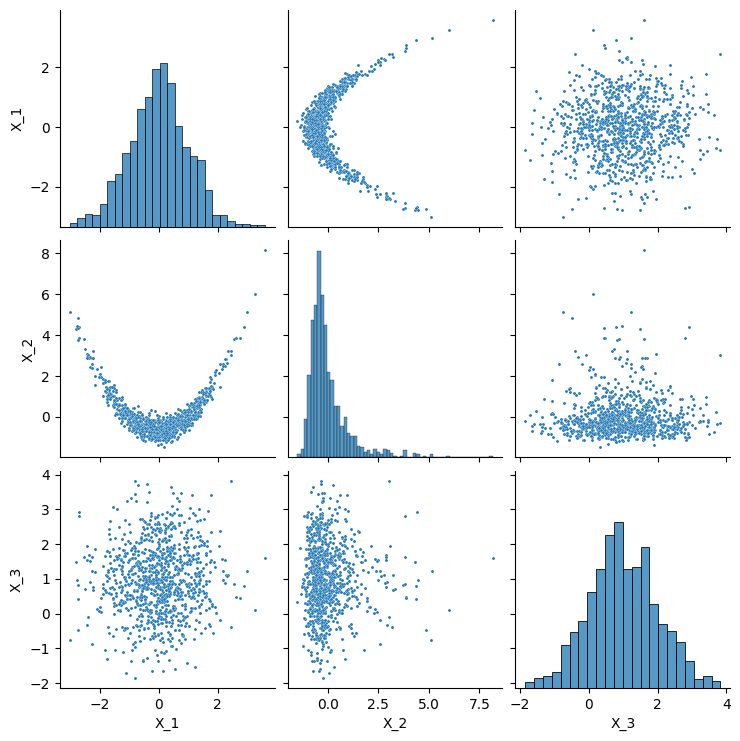

In [6]:
data = pd.read_csv("sliced_normals/Sample_Data.csv")[['X_1','X_2','X_3']]
sns.pairplot(data, plot_kws={'s': 5})

# Get FMLE

In [7]:
d = 2
B_fmle = get_FMLE(data, d)
evaluate_true_log_likelihood(data, B_fmle, d, n_grid=1000000)

np.float64(-5.019049034216916)

# Get Data MLE

In [8]:
max_iter = 2000
min_grad_norm=5e-4

B_opt = estimate_optimal_B(data, degree=2, n_grid=5000, verbosity=1, penalty_lambda = 0,max_iterations = max_iter, min_gradient_norm = min_grad_norm)

Optimizing...
Terminated - min grad norm reached after 898 iterations, 6.81 seconds.



In [9]:
evaluate_true_log_likelihood(data, B_opt, d, n_grid=1000000)

np.float64(-3.095766514035279)

# Run MCMC

In [10]:
# True MLE
samples_df = run_mcmc_sampler(data, B=B_opt, d=2, num_samples=2000, burnin=300, thin=5)

100%|██████████| 2000/2000 [00:01<00:00, 1214.92it/s]


In [11]:
# F-MLE
samples_df_FMLE = run_mcmc_sampler(data, B=B_fmle, d=2, num_samples=2000, burnin=300, thin=5)

100%|██████████| 2000/2000 [00:01<00:00, 1211.47it/s]


# Plot

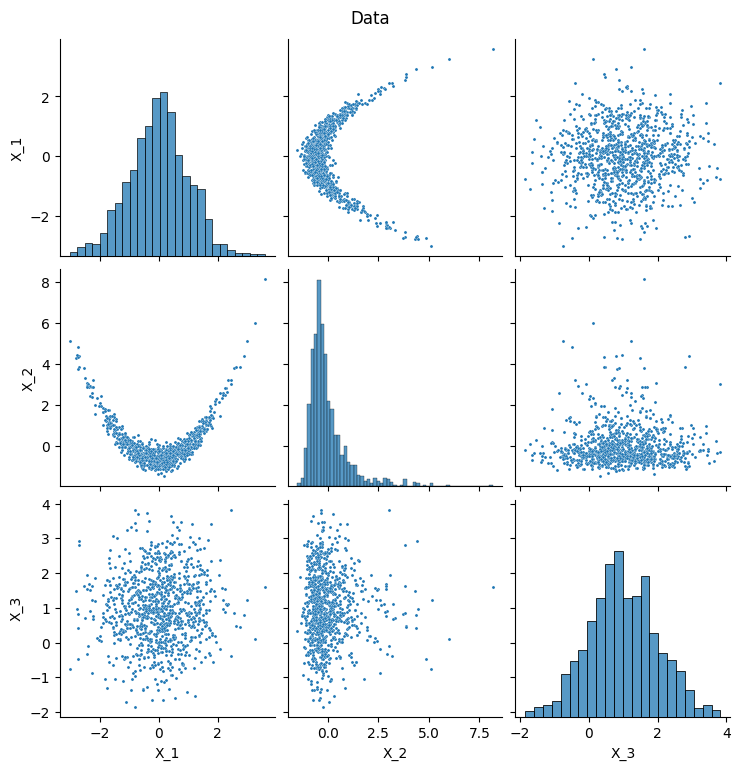

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# First pairplot: original data
g1 = sns.pairplot(data, plot_kws={'s': 5})
g1.fig.suptitle("Data", y=1.02)

# Save axis limits
lims = {}
for i, row_axes in enumerate(g1.axes):
    for j, ax in enumerate(row_axes):
        if ax:  # skip empty axes
            lims[(i, j)] = (ax.get_xlim(), ax.get_ylim())


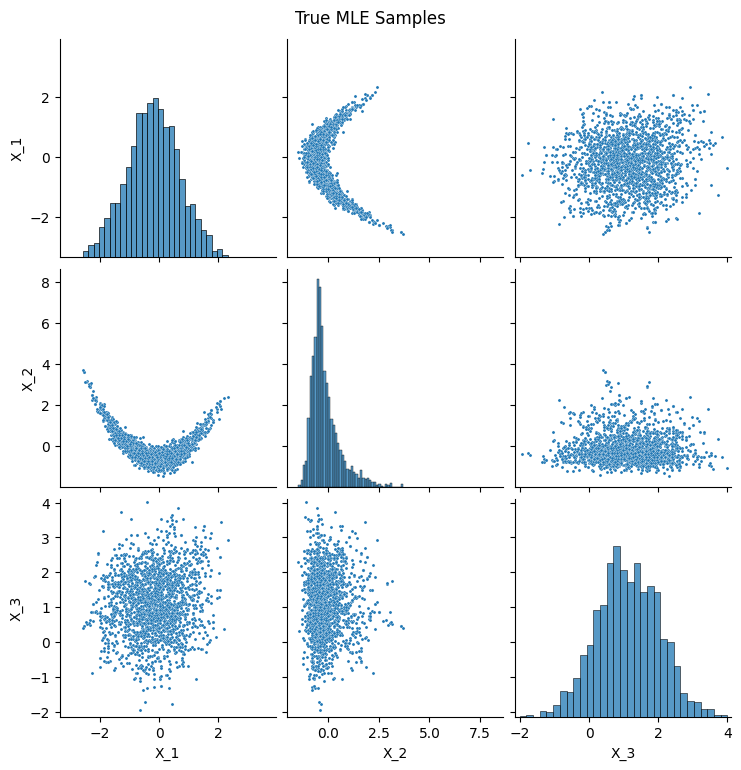

In [13]:
# Second pairplot: first sample
g2 = sns.pairplot(samples_df, plot_kws={'s': 5})
g2.fig.suptitle("True MLE Samples", y=1.02)

# Apply saved limits
for i, row_axes in enumerate(g2.axes):
    for j, ax in enumerate(row_axes):
        if ax and (i, j) in lims:
            ax.set_xlim(lims[(i, j)][0])
            ax.set_ylim(lims[(i, j)][1])



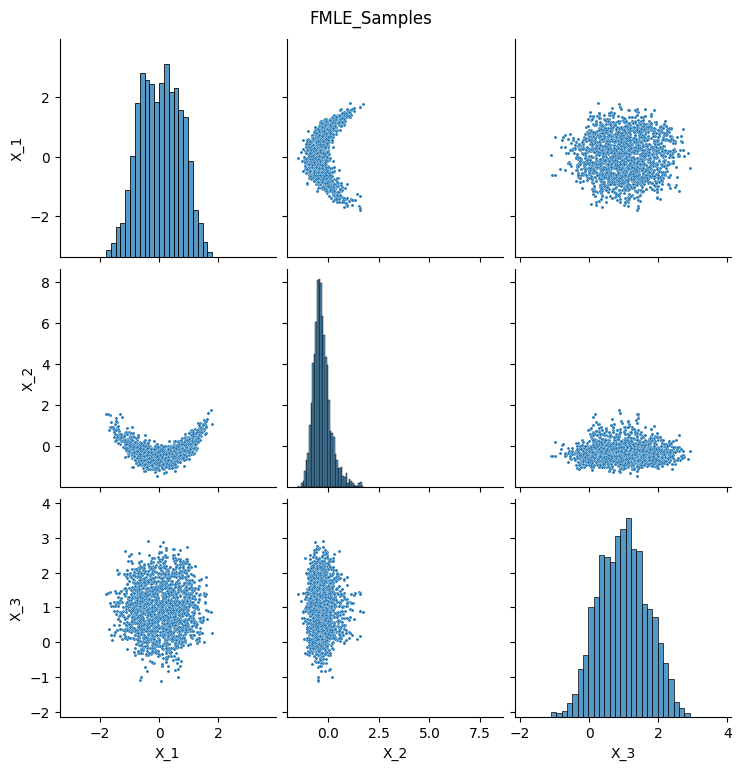

In [14]:

# Third pairplot: another sample (or same if repeating)
g3 = sns.pairplot(samples_df_FMLE, plot_kws={'s': 5})
g3.fig.suptitle("FMLE_Samples", y=1.02)

# Apply same limits again
for i, row_axes in enumerate(g3.axes):
    for j, ax in enumerate(row_axes):
        if ax and (i, j) in lims:
            ax.set_xlim(lims[(i, j)][0])
            ax.set_ylim(lims[(i, j)][1])